# The evolution of house prices and GDP growth in Denmark

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2 SKAL MED??
plt.style.use('seaborn-whitegrid')
#import pydst SKAL MED????
#dst = pydst.Dst(lang='en') SKAL MED??

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading data for GDP and house prices in Denmark from 2012-2022

The data for GDP is downloaded from "Danmarks Statistik NAN1", and the data for House Prices is downloaded from "Finans Danmark boligstatistik BM010".

In [342]:
#Loading data for GDP
df_gdp = pd.read_excel('GDP.xlsx', skiprows=2)

#Loading data for House Prices (unit: kr. per m2)
df_hp = pd.read_excel('Houseprices.xlsx', skiprows=2)

# Cleaning data for GDP

In [343]:
#Cleaning data for GDP

#Giving a column title for the different units for GDP:
df_gdp.rename(columns={'Unnamed: 1': 'GDP unit'}, inplace=True)

#Removing the columns that is not used
del df_gdp['Unnamed: 0']

#Only keeping the GDP growth values
I = df_gdp['GDP unit'] == 'Realvækst i forhold til foregående periode (pct.)'
df_gdp = df_gdp[I]

#Dropping missing values
df_gdp = df_gdp.dropna()

df_gdp.head()


,GDP unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Realvækst i forhold til foregående periode (pct.),0.2,0.9,1.6,2.3,3.2,2.8,2.0,1.5,-2.0,4.9,3.8


**MANGLER**

Then I "transform" the data for GDP, such that the years are rows insted af of columns, and the values for GDP is listed in one column.

In [344]:
# e. convert to long
df_gdp_long = pd.wide_to_long(df_gdp, stubnames=['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], i='GDP', j='year', sep='_')
#df_gdp_long.reset_index(inplace=True)

print(df_gdp_long)

# # f. drop missing and convert to float
# I = prices_long.loc[prices_long.price == '..']
# prices_long.drop(I.index, inplace=True)
# prices_long.price = prices_long.price.astype('float')

# # g. create date variable
# prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
#           + 'Q' # add the letter Q 
#           + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
# prices_long['date'] = pd.to_datetime(prices_long.d)

# # h. cleanup 
# del prices_long['year_quarter']
# del prices_long['d']

# prices_long.head()

ValueError: stubname can't be identical to a column name

In [353]:
#alternativ metode: ????

# transpose the dataframe
df_gdp_transposed = df_gdp.transpose()

# show the transposed dataframe
print(df_gdp_transposed)



                                                          2
GDP unit  Realvækst i forhold til foregående periode (pct.)
2012                                                    0.2
2013                                                    0.9
2014                                                    1.6
2015                                                    2.3
2016                                                    3.2
2017                                                    2.8
2018                                                    2.0
2019                                                    1.5
2020                                                   -2.0
2021                                                    4.9
2022                                                    3.8



I now create a line plot for the GDP growth.

In [349]:
#Creating lists to create a line plot
#x-axis
years_GDP = []

for year in range(2012, 2023):
    years_GDP.append(year)

#y-axis
#HVORDAN KAN DET GØRES SMARTERE???
GDP_growth = [0.2, 0.9, 1.6, 2.3, 3.2, 2.8, 2.0, 1.5, -2.0, 4.9, 3.8]

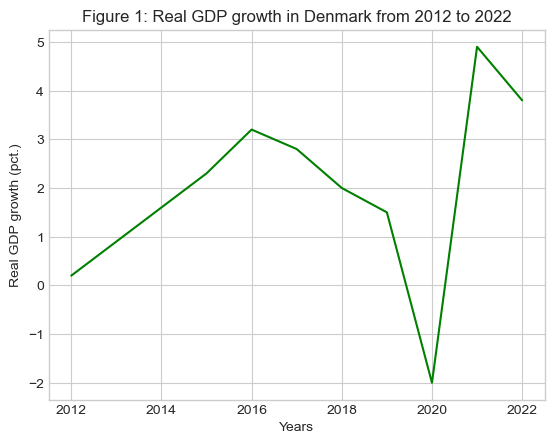

In [355]:
# creating a line plot
plt.plot(years_GDP, GDP_growth, linestyle='-', color='Green') 
plt.xlabel('Years') 
plt.ylabel('Real GDP growth (pct.)') 
plt.title('Figure 1: Real GDP growth in Denmark from 2012 to 2022') 
plt.show() 

# Cleaning data for House Prices

In [354]:
#Cleaning data for Houseprices 

#Giving a column title for the municipalities:
df_hp.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

#Removing the columns that is not used
del df_hp['Unnamed: 0']
del df_hp['Unnamed: 1']

#Renaming time colums 1992K1 -> price1992 q1
timecolumn_dict = {} 
for y in range(2012,2022+1): 
    for k in range(1,4+1): 
        q_from = f'{y}K{k}'
        q_to   = f'price{y} q{k}'
        timecolumn_dict[q_from] = q_to
df_hp = df_hp.rename(columns = timecolumn_dict)

#Dropping missing values
df_hp = df_hp.dropna()


df_hp.head()

,municipality,price2012 q1,price2012 q2,price2012 q3,price2012 q4,price2013 q1,price2013 q2,price2013 q3,price2013 q4,price2014 q1,...,price2020 q3,price2020 q4,price2021 q1,price2021 q2,price2021 q3,price2021 q4,price2022 q1,price2022 q2,price2022 q3,price2022 q4
0,Hele landet,10972,11072,11084,10931,11041,11167,11128,11082,11100,...,14752,15076,15736,16377,16595,16528,16747,16898,16412,15491
1,København,22289,23782,23343,22932,24217,24611,24334,25883,25429,...,40458,42173,45636,46966,49455,47726,48374,50551,48954,42327
2,Frederiksberg,27052,27321,33137,34696,35653,34015,30697,33955,38057,...,54290,64237,63713,74204,73317,77872,80966,90034,76108,54166
3,Dragør,23083,19853,20733,21718,22948,23766,23803,23063,24022,...,33646,31565,35614,39863,37155,38977,39221,39417,41378,34750
4,Tårnby,17417,18042,19078,18386,18540,19386,21018,20756,20155,...,29363,29819,32239,36583,36839,34563,35810,35703,33769,29328


**Mangler** 

Calculating the average house price for each year (kr. per m2)

In [ ]:
#Calculating the average house price for each year



**Mangler**

Calculating the Real House Prices Growth

**Mangler** 

Creating a line plot of the Real House Price Growth

In [357]:
# creating a line plot
plt.plot(x value, y value, linestyle='-', color='Green') 
plt.xlabel('Years') 
plt.ylabel('Real House Prices growth (pct.)') 
plt.title('Figure 2: Real House Prices growth in Denmark from 2012 to 2022') 
plt.show() 

SyntaxError: invalid syntax (758295604.py, line 2)

In [ ]:
#Producing a summary statistics for house prices
df_hp.describe()

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION. 